relative inclination =  75.00000000000001
P_2/P_1 =  129.90381091674502
sin(i3)/sin(i) - beta =  -8.673617379884035e-19


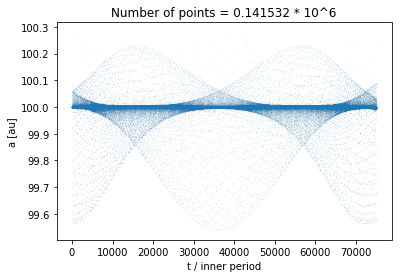

number of integration steps =  14153200
end simulation time in innerP's =  75000.21925719491


In [10]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

#Define the rebound simulation
sim1 = rebound.Simulation()

#Define the masses and mass ratios of the system
m1 = 30
m2 = 20
m3 = 30
m = m1 + m2
M = m + m3
eta = m1*m2/m**2
eta3 = m*m3/M**2

#Define the initial orbit elements of the inner binary
inner_a = 100
inner_e = 0.999
inner_w = 0*np.pi/180
inner_Omega = 0
inner_f = 0

#Define the initial orbit elements of the outer binary
outer_A = 3000
outer_E = 0.7
outer_w3 = 0*np.pi/180
outer_Omega3 = np.pi
outer_f = 180

#Define the initial relative inclination
z = 75*np.pi/180 

#Calculate the angular momenta of the inner and outer binary
Jb = m*eta*(m*inner_a*(1-inner_e**2))**0.5
J3 = M*eta3*(M*outer_A*(1-outer_E**2))**0.5
beta = Jb/J3
#Determine the initial inclinations of the inner and outer binary to align J with z
outer_i3 = np.arctan(((beta**-1 + np.cos(z))/np.sin(z))**-1)
inner_i =  np.arctan(((beta + np.cos(z))/np.sin(z))**-1) 

#Define the rebound simulation by adding the three masses with corresponding orbit elements
sim1.add(m=m1)                
sim1.add(m=m2, a=inner_a, e=inner_e, inc=inner_i,  omega=inner_w,
         Omega=inner_Omega,f = inner_f*np.pi/180)
sim1.add(m=m3, a=outer_A, e=outer_E, inc=outer_i3, omega=outer_w3,
         Omega=outer_Omega3,f = outer_f*np.pi/180)
sim1.move_to_com()

#Print important quantities as a check
Pratio = sim1.particles[2].P/sim1.particles[1].P
print("relative inclination = ",(inner_i+outer_i3)*180/np.pi)
print("P_2/P_1 = ",Pratio)
print("sin(i3)/sin(i) - beta = ",np.sin(outer_i3)/np.sin(inner_i)-beta)


#Define the period of the inner orbit in rebound's system of units
innerP = sim1.particles[1].P

#Set the integration time,
tf = 75000*sim1.particles[1].P

#Define empty lists for the data to fill
efcn1,zfcn1,afcn1,tlist,Efcn1,Afcn1 = [],[],[],[],[],[]

#Integration loop
while sim1.t < tf:
    #Append the current the values of orbit elemenths to the corresponding list
    afcn1.append(sim1.particles[1].a)
    Afcn1.append(sim1.particles[2].a)
    zfcn1.append(sim1.particles[1].inc + sim1.particles[2].inc)
    efcn1.append(sim1.particles[1].e)
    Efcn1.append(sim1.particles[2].e)
    tlist.append(sim1.t)   
    #Integrate the system forward by x steps
    sim1.steps(100)
    
#Scatter plot the a and t data
plt.scatter(np.array(tlist)/innerP,afcn1,s=0.001)
plt.title("Number of points = {} * 10^6".format(len(tlist)/10**6))
plt.xlabel('t / inner period')
plt.ylabel('a [au]')
plt.show()


print("number of integration steps = ",sim1.steps_done)
print("end simulation time in innerP's = ",sim1.t/innerP)

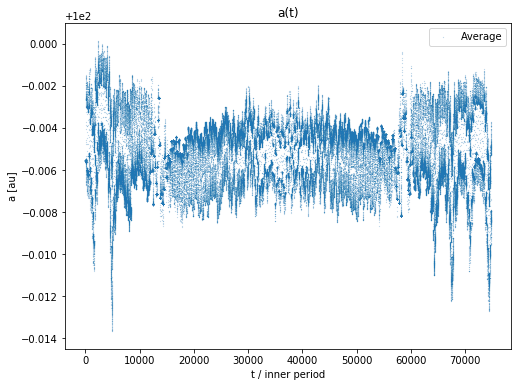

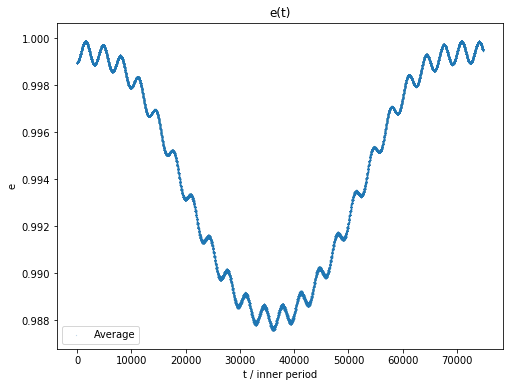

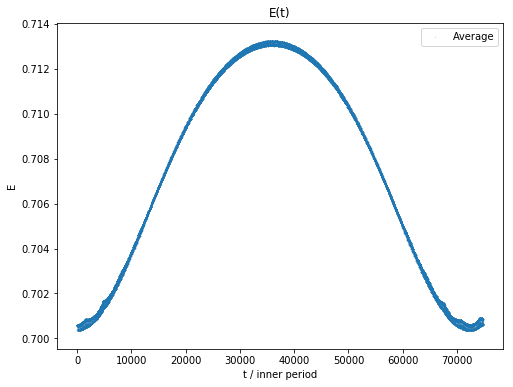

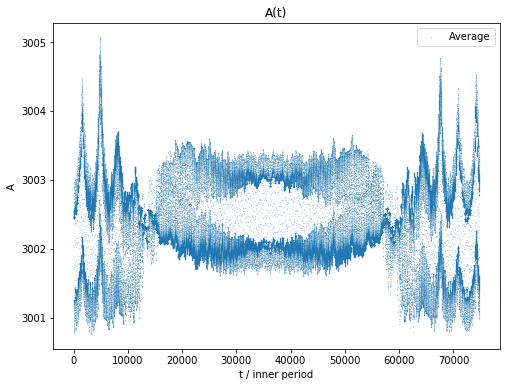

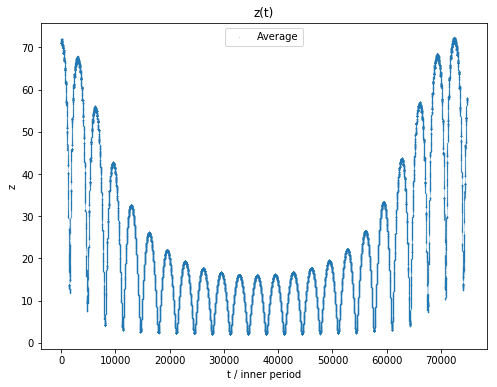

In [12]:
N = 2*int(len(afcn1)/((tlist[-1])/innerP/Pratio))
tlist=np.array(tlist)
aved_a = np.convolve(afcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,afcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_a)]/innerP,aved_a,label="Average",s=0.01)
plt.title("a(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('a [au]')
plt.show()

aved_e = np.convolve(efcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_e)]/innerP,aved_e,label="Average",s=0.01)
plt.title("e(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('e')
plt.show()

aved_E = np.convolve(Efcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_E)]/innerP,aved_E,label="Average",s=0.01)
plt.title("E(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('E')
plt.show()

aved_A = np.convolve(Afcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,efcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_A)]/innerP,aved_A,label="Average",s=0.01)
plt.title("A(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('A')
plt.show()

zfcn1 = 180/np.pi*np.array(zfcn1)
aved_z = np.convolve(zfcn1,np.ones(N)/N,mode='valid')
plt.figure(figsize=(8, 6))
#plt.scatter(np.array(tlist)/innerP,zfcn1,label="Exact",s=0.01)
plt.scatter(tlist[:len(aved_z)]/innerP,aved_z,label="Average",s=0.01)
plt.title("z(t)")
plt.legend()
plt.xlabel('t / inner period')
plt.ylabel('z')
plt.show()

In [13]:
tlist=tlist/innerP
tlist.astype('float32').tofile('npt.dat')
aved_z.astype('float32').tofile('npavz.dat')
aved_E.astype('float32').tofile('npavE.dat')
aved_e.astype('float32').tofile('npavee.dat')

In [11]:
zfcn1

[1.3089969389957596,
 1.308996931502272,
 1.3089697988568103,
 1.3089697965824614,
 1.308888296743561,
 1.308888296720321,
 1.308752187315188,
 1.308752186990881,
 1.3085612119495598,
 1.3085610582454523,
 1.3084137383665817,
 1.3083143305607094,
 1.3083136048672221,
 1.3080112512915578,
 1.3080112468049525,
 1.3076508897308907,
 1.3076508896980679,
 1.3072321336533046,
 1.3072321303741972,
 1.3067550177542853,
 1.3067536648801705,
 1.3066593535948414,
 1.3062139823657106,
 1.30621351590362,
 1.3056113581659523,
 1.3056113554650621,
 1.3049438408067489,
 1.3049438407429348,
 1.3042092569687338,
 1.3042092367147595,
 1.303413324361997,
 1.3034050934985253,
 1.3033588819712563,
 1.3025286798124083,
 1.302528434886618,
 1.3015769632659084,
 1.3015769618707507,
 1.300546585278244,
 1.300546585003673,
 1.2994339330027311,
 1.2994338309699895,
 1.2982772196727923,
 1.2982345992156596,
 1.2982115337146747,
 1.2969443629829824,
 1.2969442345156181,
 1.2955581287307505,
 1.2955581279985242,
 1.

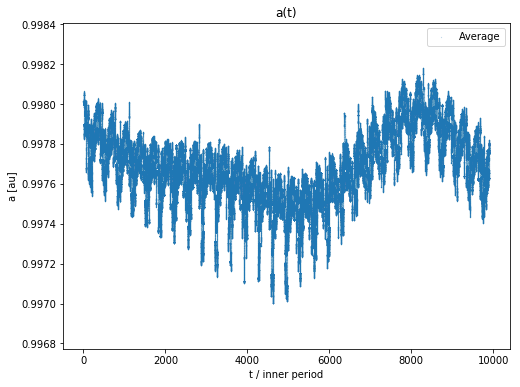